### Sample Linear regression 
with salary data from kaggle (https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression/data)
the data have 2 columns years of experience (x) and salary (y)


In [244]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [245]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [246]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


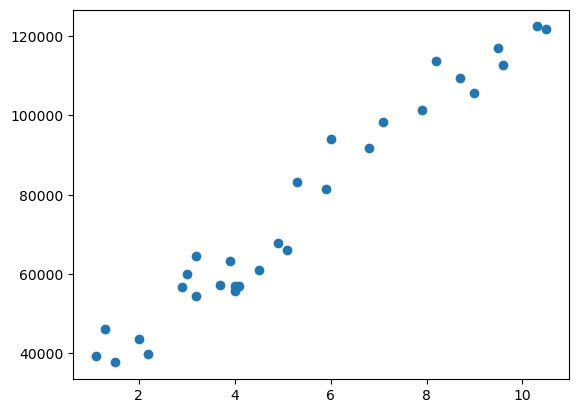

In [247]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [248]:
# make x and y 
num= len(df["Salary"])
per80 = int(num*0.8)

per80

24

In [279]:
yrs_train = df["YearsExperience"][0:per80]
X_train = torch.Tensor(yrs_train.to_numpy()).unsqueeze(1)

yrs_test = df["YearsExperience"][per80:]
X_test = torch.Tensor(yrs_test.to_numpy()).unsqueeze(1)

sal_train = df["Salary"][0:per80]
y_train = torch.Tensor(sal_train.to_numpy()).unsqueeze(1)

sal_test = df["Salary"][per80:]
y_test = torch.Tensor(sal_test.to_numpy()).unsqueeze(1)

y_train,y_test


(tensor([[ 39343.],
         [ 46205.],
         [ 37731.],
         [ 43525.],
         [ 39891.],
         [ 56642.],
         [ 60150.],
         [ 54445.],
         [ 64445.],
         [ 57189.],
         [ 63218.],
         [ 55794.],
         [ 56957.],
         [ 57081.],
         [ 61111.],
         [ 67938.],
         [ 66029.],
         [ 83088.],
         [ 81363.],
         [ 93940.],
         [ 91738.],
         [ 98273.],
         [101302.],
         [113812.]]),
 tensor([[109431.],
         [105582.],
         [116969.],
         [112635.],
         [122391.],
         [121872.]]))

In [250]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim, output_dim):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = input_dim, out_features =output_dim)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        out = self.linear_layer(x)
        return out

model = LinearRegressionModel(1,1)

list(model.parameters())


[Parameter containing:
 tensor([[-0.3840]], requires_grad=True),
 Parameter containing:
 tensor([-0.9726], requires_grad=True)]

In [287]:
#inference mode turns off the tracking of gradient
# so u don't train it on testing data 
with torch.inference_mode(): 
    y_preds = model(X_test)

In [289]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None,
                    model_weights=None,
                     model_bias=None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=8, label="Training data")
    #plot test data 
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    if model_weights is not None and model_bias is not None and test_data is not None:
        # Plot the linear regression line
        with torch.inference_mode(): #for efficiency
            y_pred_line = model_weights * test_data + model_bias
        plt.plot(test_data.numpy(), y_pred_line.numpy(), c="orange", label="Linear Regression Line")

    
    plt.legend(prop={"size": 14});

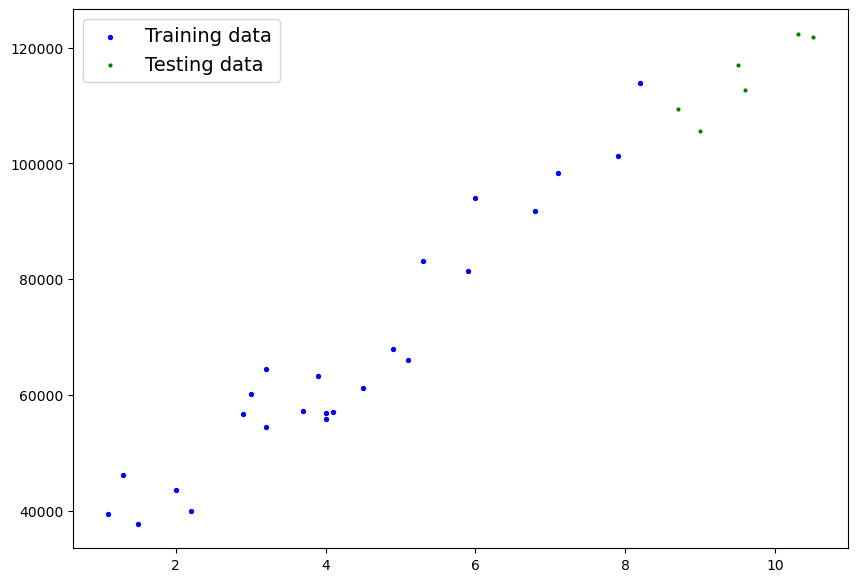

In [291]:
plot_predictions()

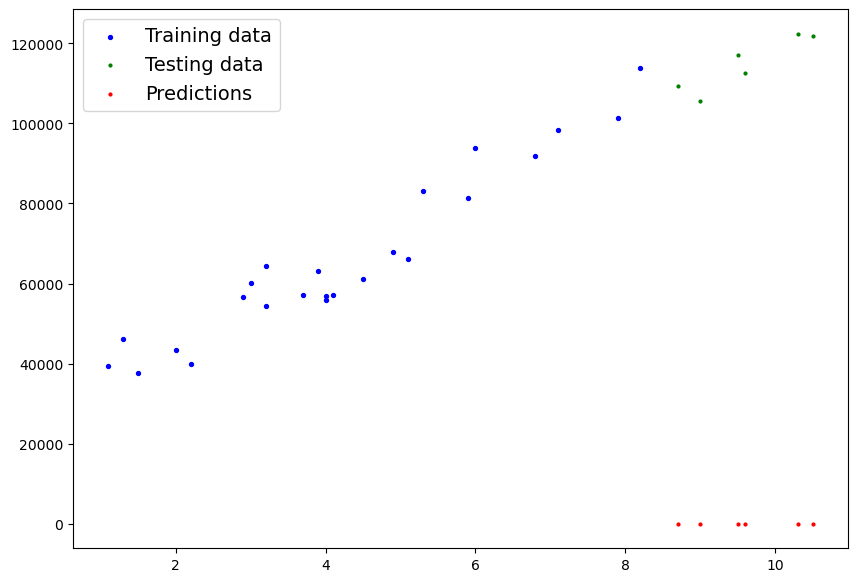

In [293]:
plot_predictions(predictions=y_preds)

### Training Model 
with the loss function (lower is better)
Optimizer tells model how to update its internal parameters to best lower the loss.

In [295]:
# Setup loss function
loss_fn= nn.L1Loss()

# Setup Optimizer
optimizer= torch.optim.SGD(model.parameters(), lr=0.01) #lr = learning Rate (Hyper parameter)

### Building the training Loop for the model

In [307]:
test_losses = []
train_losses = []

epochs = 1500000 # epoch is the number of iteration of the training loop
for epoch in range(epochs):
    #put model in training mode; Set the module in training mode.
    model.train()
    # 1. Forward pass on train data
    y_pred = model(X_train)
    # 2. calculate the loss 
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer 
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Progress the optimizer
    optimizer.step()
    # Put the model in evaluation mode for testing phase
    model.eval()

    # model test
    with torch.inference_mode():
        test_pred= model(X_test)
        test_loss = loss_fn(test_pred,y_test)
        train_losses.append(loss.detach().item())
        test_losses.append(test_loss.detach().item())

    if epoch%10000==0:
        print(f"{epoch}--epoch   train loss: {loss.item():.4f}----test loss:{test_loss.item()}")
        # plot_predictions(train_data=X_train ,train_labels= y_train ,test_data=X_test ,test_labels= y_test,predictions=test_pred)

0--epoch   train loss: 37507.5273----test loss:51561.57421875
10000--epoch   train loss: 35605.5508----test loss:47383.34765625
20000--epoch   train loss: 33703.5703----test loss:43205.125
30000--epoch   train loss: 31801.5938----test loss:39026.90234375
40000--epoch   train loss: 29899.6152----test loss:34848.68359375
50000--epoch   train loss: 28015.3301----test loss:30710.5
60000--epoch   train loss: 26134.0625----test loss:26579.15625
70000--epoch   train loss: 24252.7969----test loss:22447.806640625
80000--epoch   train loss: 22371.5312----test loss:18316.462890625
90000--epoch   train loss: 20490.2637----test loss:14185.1123046875
100000--epoch   train loss: 18608.9980----test loss:10053.7685546875
110000--epoch   train loss: 16727.7324----test loss:5922.41650390625
120000--epoch   train loss: 14846.4648----test loss:2599.3515625
130000--epoch   train loss: 12965.1982----test loss:3674.567626953125
140000--epoch   train loss: 11083.9326----test loss:6471.62353515625
150000--epoch

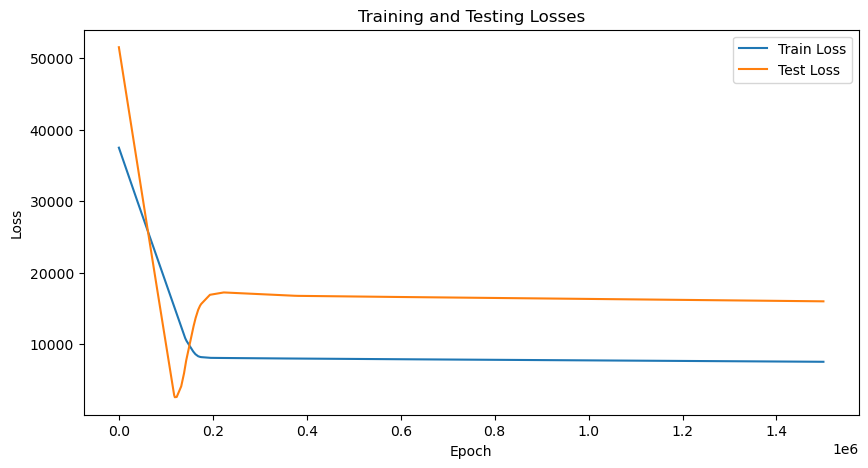

In [309]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()

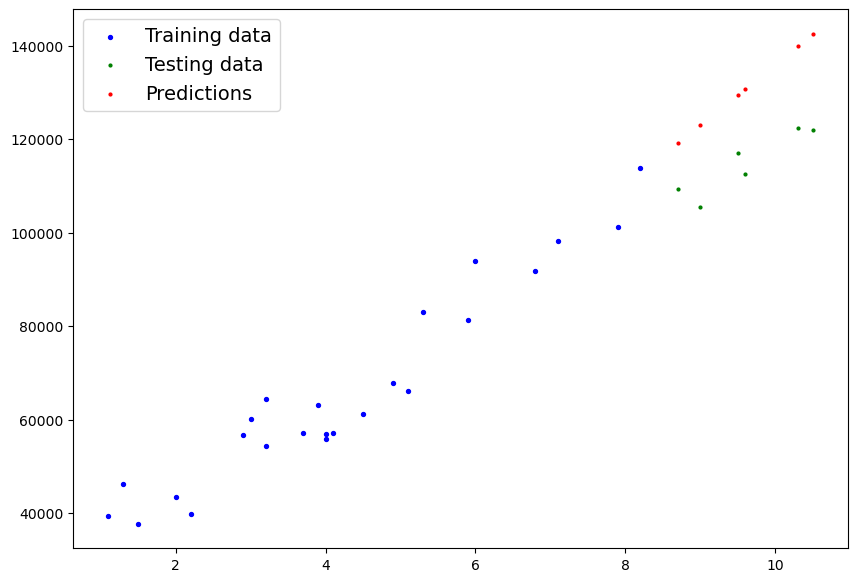

In [311]:
#inference mode turns off the tracking of gradient
# so u don't train it on testing data 
with torch.inference_mode(): 
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)